(np.float64(-3.619355980285419),
 np.float64(2.889001810295937),
 np.float64(-3.555284137398266),
 np.float64(4.145787388113625))

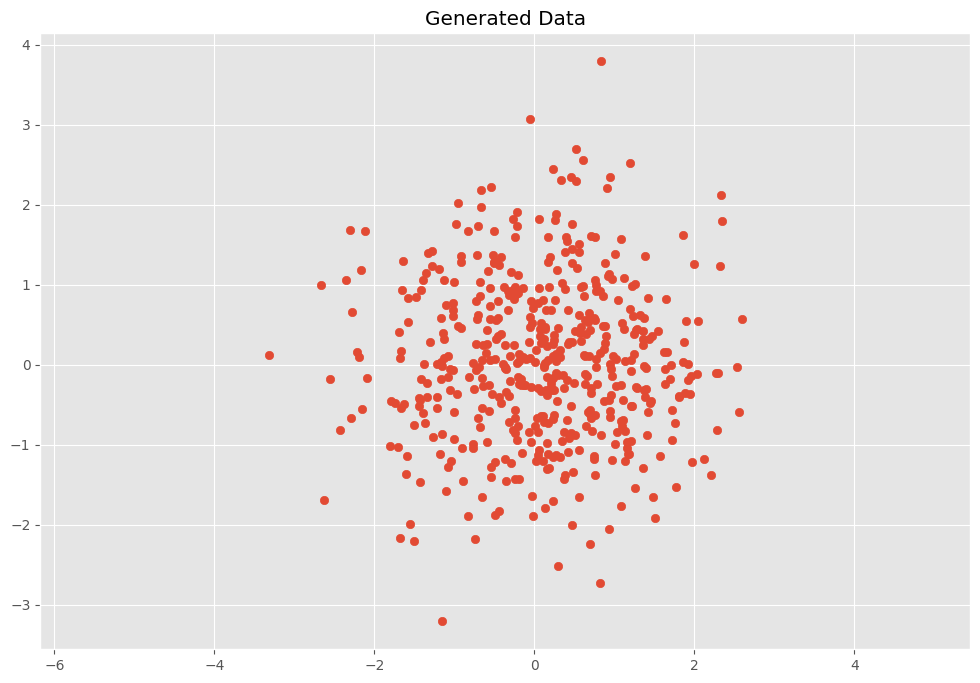

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal')


In [19]:
def cov(x,y):
    x_bar,y_bar = x.mean(),y.mean()
    
    return np.sum((x - x_bar)*(y-y_bar)) / (len(x) - 1)

def cov_mat(X):
    return np.array([[cov(X[0],X[0]), cov(X[0],X[1])],\
                     [cov(X[1],X[0]),cov(X[1],X[1])]])

In [35]:
c = cov_mat(X.T)
c

array([[1.08626147, 0.00228265],
       [0.00228265, 1.01186147]])

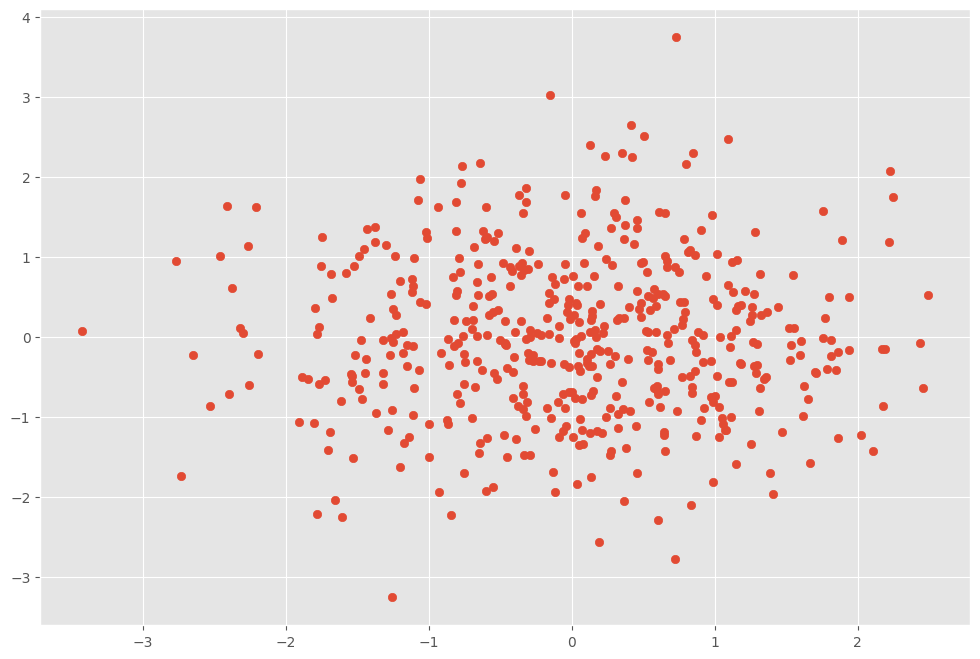

In [31]:
# Center the matrix at the origin
X = X - np.mean(X, 0)
plt.scatter(X[:,0],X[:,1])

In [36]:
S = np.sqrt(c,dtype=float)
S

array([[1.04223868, 0.04777708],
       [0.04777708, 1.00591325]])

array([[5.32268119e-01, 5.43270570e-03],
       [5.43270570e-03, 1.16971186e+01]])

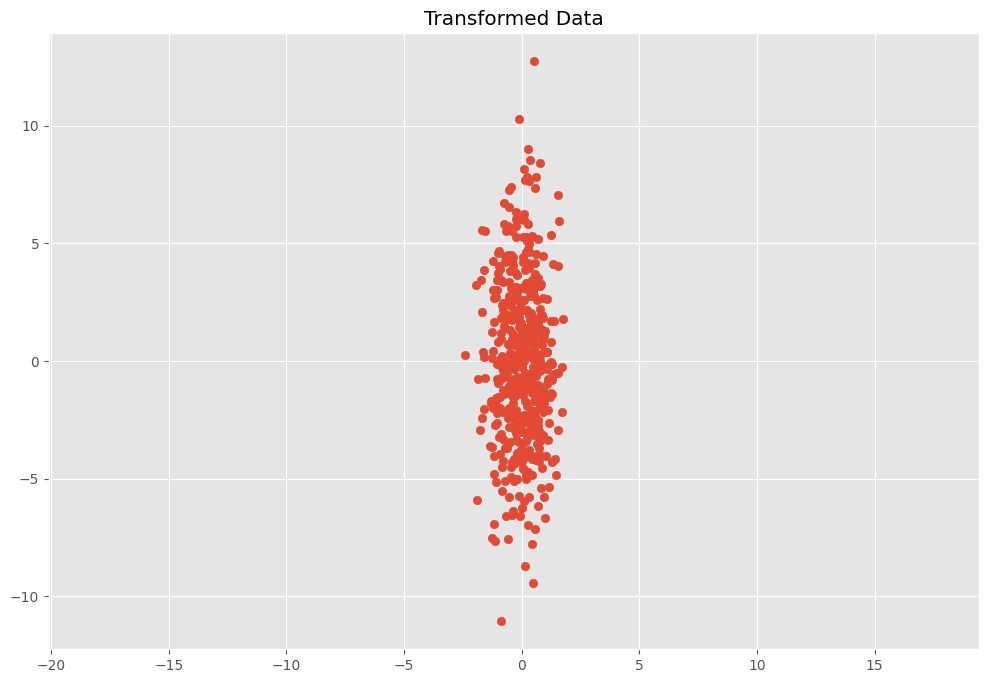

In [ ]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

array([[ 5.40964007, -5.53772523],
       [-5.53772523,  6.81974661]])

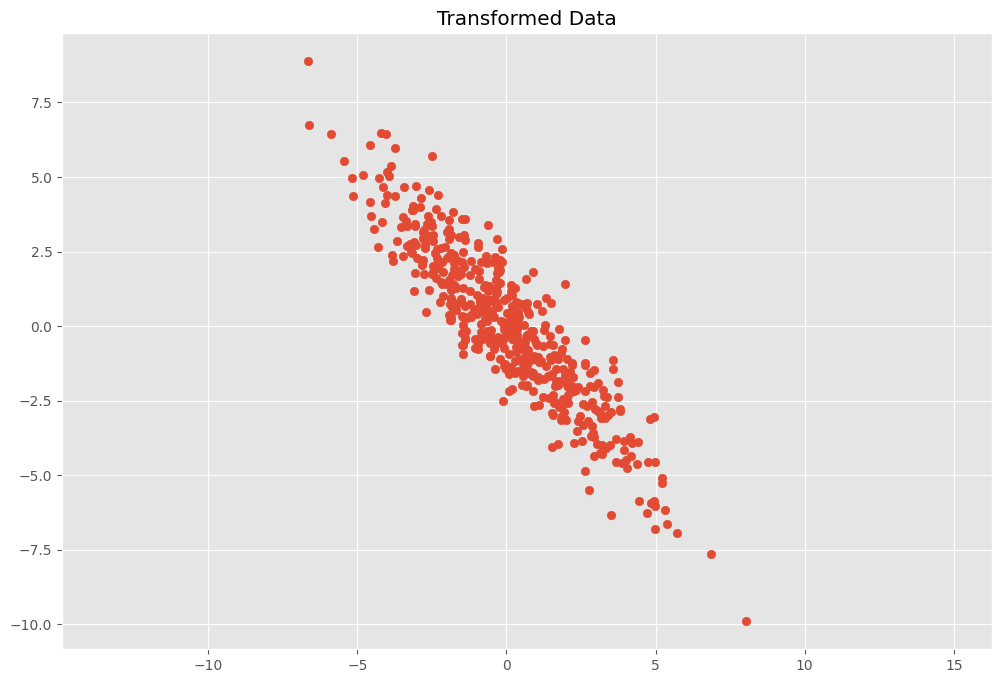

In [45]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)

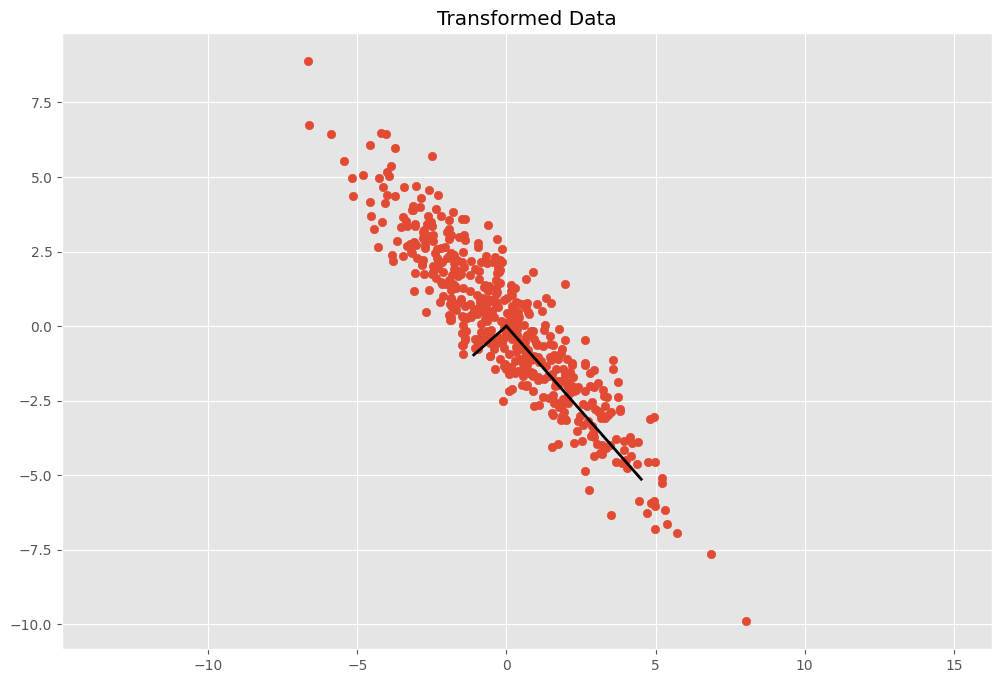

In [49]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 2*np.sqrt(e)*v[0]], [0, 2*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');